In [2]:
# packages and dependencies import
import pandas as pd
import seaborn as sns # Used for Exploratory Data Analysis
import numpy as np
import matplotlib
from pandas import DataFrame

# matplotlib.use('TkAgg')  # or 'QtAgg' if PyQt is installed {pip install PyQt6}
import matplotlib.pyplot as plt

In [3]:
#Data Import 
data: DataFrame = pd.read_csv("/home/tjselevani/PycharmProjects/PythonProject/data/last-3-months-transactions.csv")

In [4]:
data.head()

,vehicle_booked,amount,payment_status,transaction_type,created_at
0,SM192,100,3,CREDIT,2024-12-01 05:49:02.000000
1,SM192,50,2,CREDIT,2024-12-01 05:49:25.000000
2,SM192,100,2,CREDIT,2024-12-01 05:52:20.000000
3,SM944,200,2,CREDIT,2024-12-01 07:18:07.000000
4,SM055,80,2,CREDIT,2024-12-01 07:43:04.000000


In [5]:
data.tail()

,vehicle_booked,amount,payment_status,transaction_type,created_at
9103,SM055,80,2,CREDIT,2025-03-11 18:38:30.000000
9104,SM055,80,3,CREDIT,2025-03-11 18:39:51.000000
9105,SM055,80,2,CREDIT,2025-03-11 18:41:19.000000
9106,SM944,70,3,CREDIT,2025-03-11 19:48:21.000000
9107,SM055,-2620,2,DEBIT,2025-03-11 19:52:04.000000


In [6]:
data.shape

(9108, 5)

In [7]:
data.columns

Index(['vehicle_booked', 'amount', 'payment_status', 'transaction_type',
       'created_at'],
      dtype='object')

In [8]:
data.describe()

,amount,payment_status
count,9.108000e+03,9108.000000
mean,7.803261e+04,2.145696
std,7.444778e+06,0.353753
min,-2.880000e+04,0.000000
25%,5.000000e+01,2.000000
50%,8.000000e+01,2.000000
75%,1.200000e+02,2.000000
max,7.104987e+08,3.000000


In [9]:
data.isnull().sum()

vehicle_booked      0
amount              0
payment_status      0
transaction_type    0
created_at          0
dtype: int64

In [10]:
#Data Visualization

In [11]:
# Global variables for filtering
# Example: Select multiple vehicles (or set to None for all vehicles)
VEHICLES_SELECTED = ["SM192"]  # or None for all
TRANSACTION_TYPE = "CREDIT"
VEHICLE_BOOKED = "SM055" 

In [12]:
# Filter data for the specific vehicle "sm191"
if VEHICLES_SELECTED is None:
    vehicle_data = data[data['transaction_type'] == TRANSACTION_TYPE].copy()
else:
    vehicle_data = data[(data['vehicle_booked'].isin(VEHICLES_SELECTED)) & 
                        (data['transaction_type'] == TRANSACTION_TYPE)].copy()

In [13]:

# Convert 'created_at' to datetime
vehicle_data['created_at'] = pd.to_datetime(vehicle_data['created_at'])

# Option 1: Group by Day
vehicle_data['day'] = vehicle_data['created_at'].dt.date  # Extracts only the date (YYYY-MM-DD)

# Option 2: Group by Week
vehicle_data['week'] = vehicle_data['created_at'].dt.to_period('W').astype(str)  # Group into weeks

# Option 3: Group by Month
vehicle_data['month'] = vehicle_data['created_at'].dt.to_period('M').astype(str)  # Group into months

# Option 4: Group by Year
vehicle_data['year'] = vehicle_data['created_at'].dt.year  # Extract year

/tmp/ipykernel_109549/1195783380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['hour'] = daily_data['created_at'].dt.hour


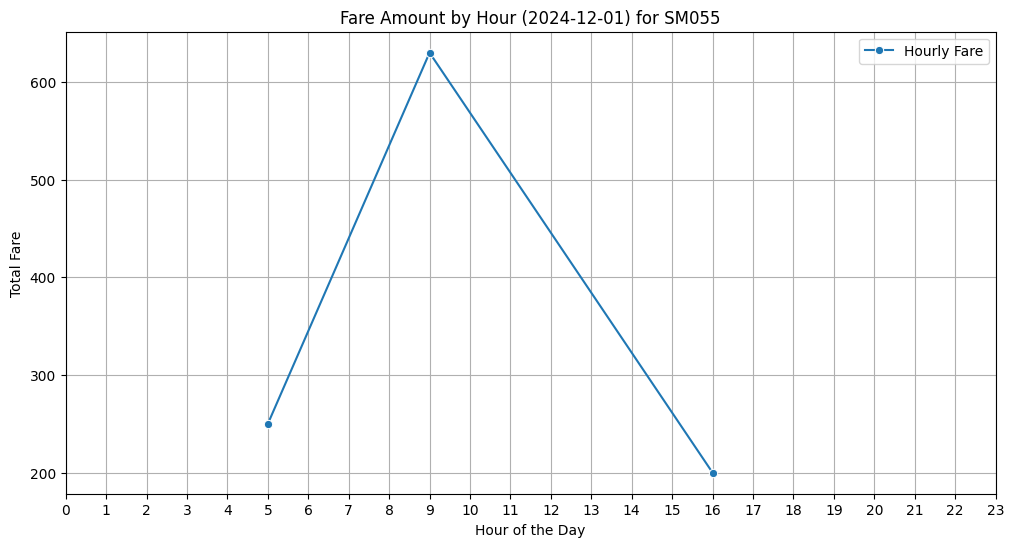

In [14]:
""" {1} """

# Filter transactions for a specific day
specific_day = "2024-12-01"  # Change this date as needed
daily_data = vehicle_data[vehicle_data['created_at'].dt.date == pd.to_datetime(specific_day).date()]

# Extract hour
daily_data['hour'] = daily_data['created_at'].dt.hour

# Aggregate fare by hour
hourly_fares = daily_data.groupby('hour')['amount'].sum().reset_index()

# Plot hourly fares
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='amount', data=hourly_fares, marker='o', label="Hourly Fare")

plt.title(f"Fare Amount by Hour ({specific_day}) for {VEHICLE_BOOKED}")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Fare")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


/tmp/ipykernel_109549/2705610360.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='amount', data=weekly_fares, palette="viridis")


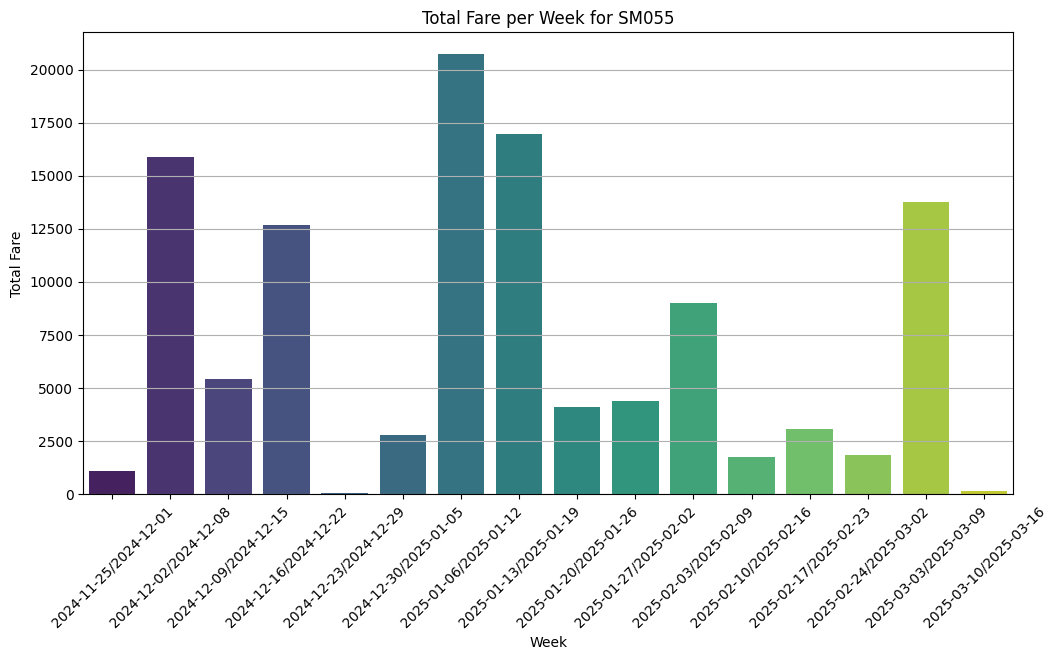

In [15]:
""" {2} """

# Extract the week from 'created_at'
vehicle_data['week'] = vehicle_data['created_at'].dt.to_period('W').astype(str)

# Aggregate total fare for each week
weekly_fares = vehicle_data.groupby('week')['amount'].sum().reset_index()

# Plot weekly fare as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='amount', data=weekly_fares, palette="viridis")

plt.title(f"Total Fare per Week for {VEHICLE_BOOKED}")
plt.xlabel("Week")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


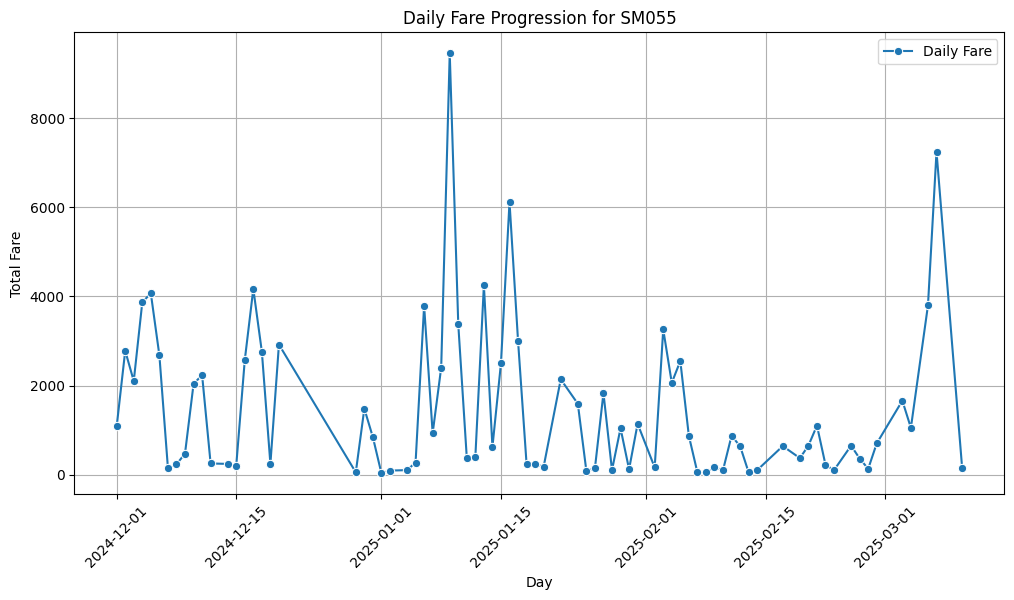

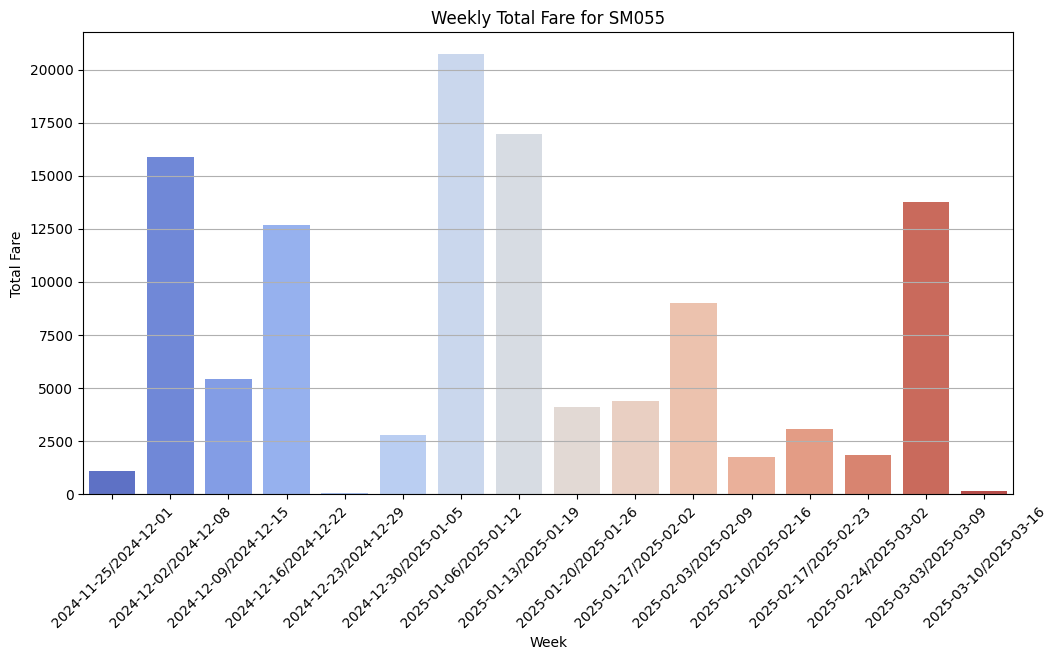

In [16]:
""" {3} """

# Extract day and week within the month
vehicle_data['day'] = vehicle_data['created_at'].dt.date
vehicle_data['month'] = vehicle_data['created_at'].dt.to_period('M').astype(str)

# Aggregate total fares by day and week
daily_fares = vehicle_data.groupby('day')['amount'].sum().reset_index()
weekly_fares = vehicle_data.groupby('week')['amount'].sum().reset_index()

# Line graph for daily progression
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='amount', data=daily_fares, marker='o', label="Daily Fare")

plt.title(f"Daily Fare Progression for {VEHICLE_BOOKED}")
plt.xlabel("Day")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar graph for weekly totals
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='amount', data=weekly_fares, hue='week', legend=False, palette="coolwarm")

plt.title(f"Weekly Total Fare for {VEHICLE_BOOKED}")
plt.xlabel("Week")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


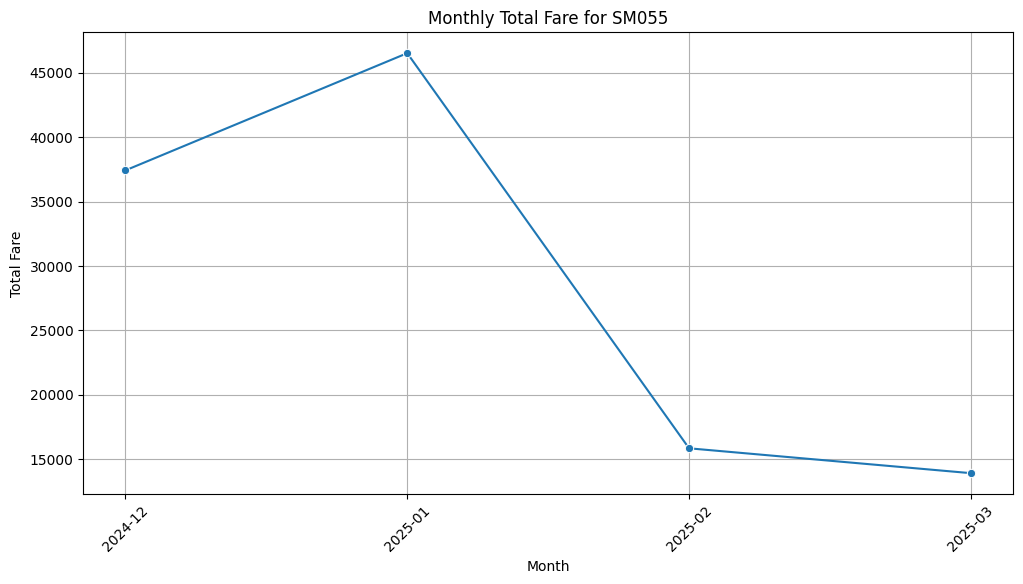

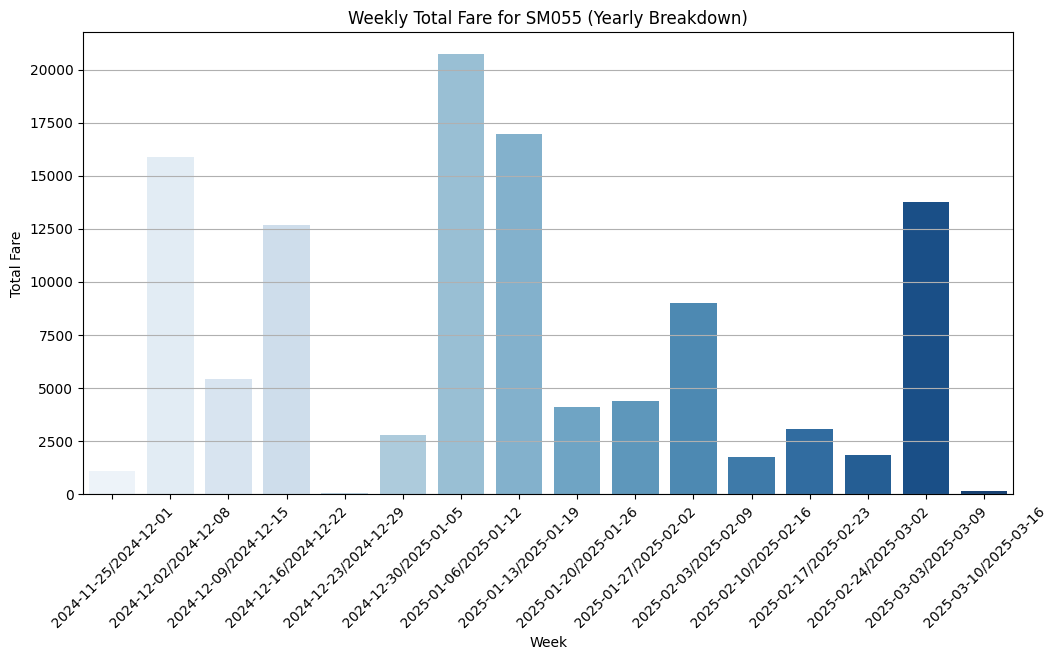

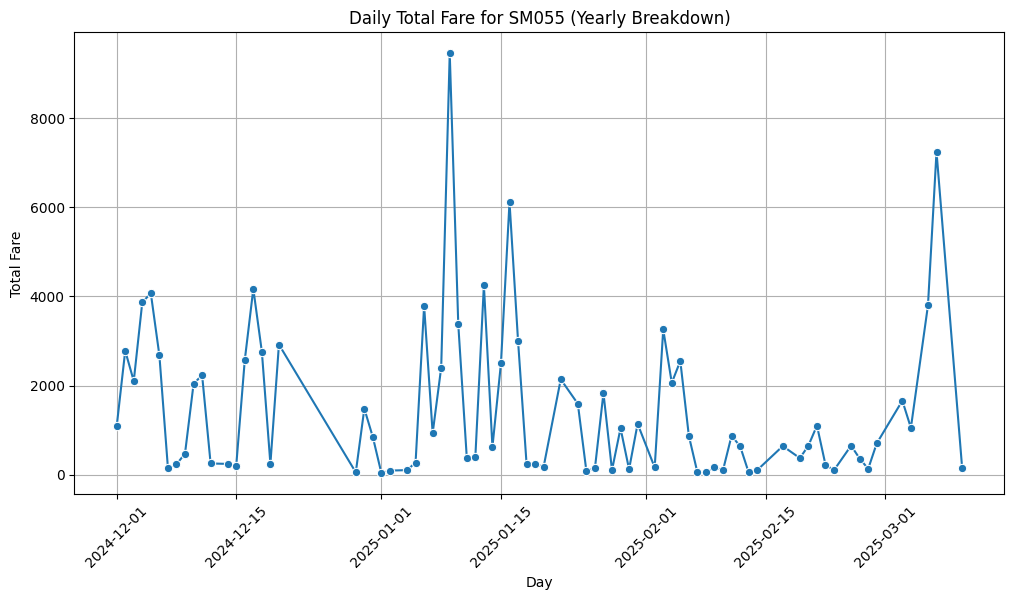

In [17]:
""" {4} """

# Extract year
vehicle_data['year'] = vehicle_data['created_at'].dt.year

# Aggregate by month, week, and day
monthly_fares = vehicle_data.groupby('month')['amount'].sum().reset_index()
weekly_fares = vehicle_data.groupby('week')['amount'].sum().reset_index()
daily_fares = vehicle_data.groupby('day')['amount'].sum().reset_index()

# Line graph for monthly totals
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='amount', data=monthly_fares, marker='o')

plt.title(f"Monthly Total Fare for {VEHICLE_BOOKED}")
plt.xlabel("Month")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar graph for weekly totals
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='amount', data=weekly_fares, hue='week', legend=False, palette="Blues")

plt.title(f"Weekly Total Fare for {VEHICLE_BOOKED} (Yearly Breakdown)")
plt.xlabel("Week")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Line graph for daily totals
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='amount', data=daily_fares, marker='o')

plt.title(f"Daily Total Fare for {VEHICLE_BOOKED} (Yearly Breakdown)")
plt.xlabel("Day")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


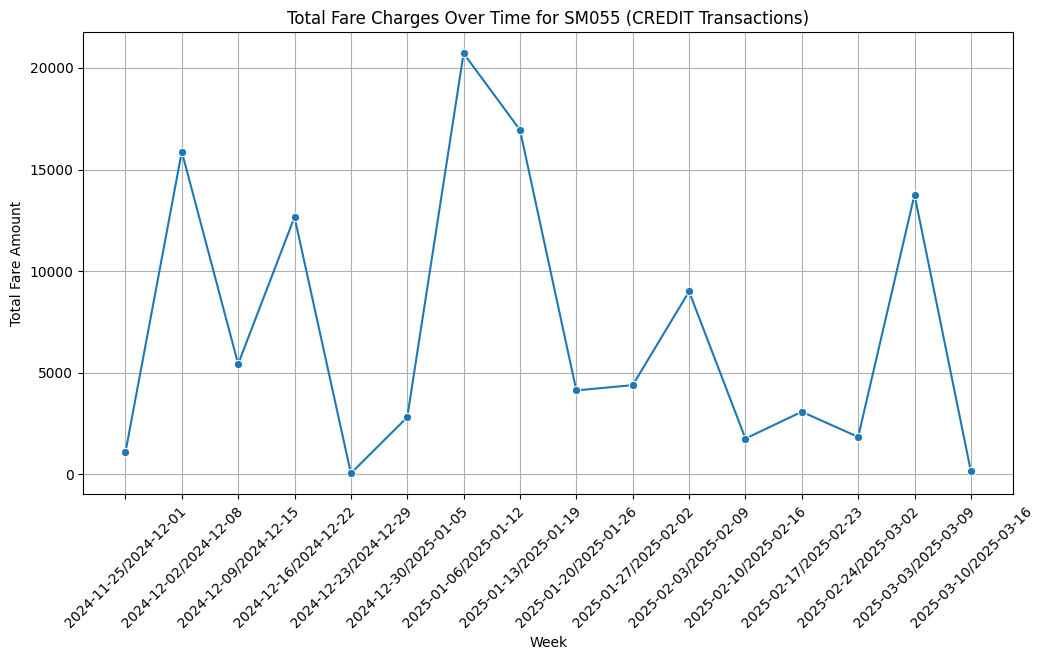

In [18]:
""" {5} """

# Choose one grouping (change 'day' to 'week', 'month', or 'year' as needed)
group_by = 'week'  # Change to 'day', 'week', 'month', or 'year' as required
aggregated_data = vehicle_data.groupby(group_by)['amount'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=group_by, y='amount', data=aggregated_data, marker='o')

# Customize graph
plt.title(f"Total Fare Charges Over Time for {VEHICLE_BOOKED} ({TRANSACTION_TYPE} Transactions)")
plt.xlabel(group_by.capitalize())  # Dynamic label
plt.ylabel("Total Fare Amount")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()
